In [34]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook

import asdf
from astropy.io import fits
from astropy.wcs import WCS
import ndcube
from specreduce.tracing import FlatTrace, KosmosTrace

In [2]:
test = fits.open("notebook_data/ib6o23rsq_flt.fits")

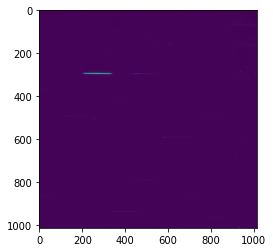

In [3]:
#im = plt.imshow(test[1].data[250:350,100:600])
im = plt.imshow(test[1].data)
im.set_clim(0, 100)

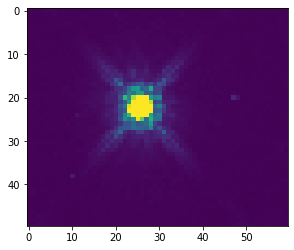

In [4]:
# Finding where the object is in the direct image

direct = fits.open("notebook_data/ib6o23rtq_flt.fits")

im2 = plt.imshow(direct[1].data[270:320,140:200])
im2.set_clim(0, 100)

In [5]:
# Use the direct image bounding box to extract the 2D spectrum

from astrogrism import extract_2d_spectrum

sliced_data = extract_2d_spectrum(test[1].data, 160, 285, 172, 300, grism="G141")

2022-06-02 14:17:26,805 - stpipe - WARNING - /Users/rosteen/projects/astrogrism/astrogrism/HST/transform_models.py:240: UserWarning: Assuming input wavelength is in micron. To specify wavelength unit, input an astropy Quantity.
  warnings.warn(f"Assuming input wavelength is in {self.l_unit}. To "



(204.26972147408998, 286.8536012589572, 160, 285, 1) (346.5395484015885, 302.9941498746553, 172, 300, 1)


In [6]:
sliced_data.shape

(17, 143)

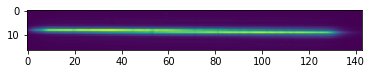

In [7]:
plt.imshow(sliced_data)

In [20]:
# Slice out the part of the error array corresponding to the 2D spectrum
error_array = extract_2d_spectrum(test[2].data, 160, 285, 172, 300, grism="G141")

2022-06-02 14:25:58,344 - stpipe - WARNING - /Users/rosteen/projects/astrogrism/astrogrism/HST/transform_models.py:240: UserWarning: Assuming input wavelength is in micron. To specify wavelength unit, input an astropy Quantity.
  warnings.warn(f"Assuming input wavelength is in {self.l_unit}. To "



(204.26972147408998, 286.8536012589572, 160, 285, 1) (346.5395484015885, 302.9941498746553, 172, 300, 1)


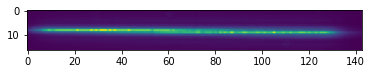

In [21]:
plt.imshow(error_array)

In [28]:
print(error_array.max())
print(sliced_data.shape[0]/2)

0.7232981
8.5


In [29]:
trace = KosmosTrace(sliced_data, guess=sliced_data.shape[0]/2)

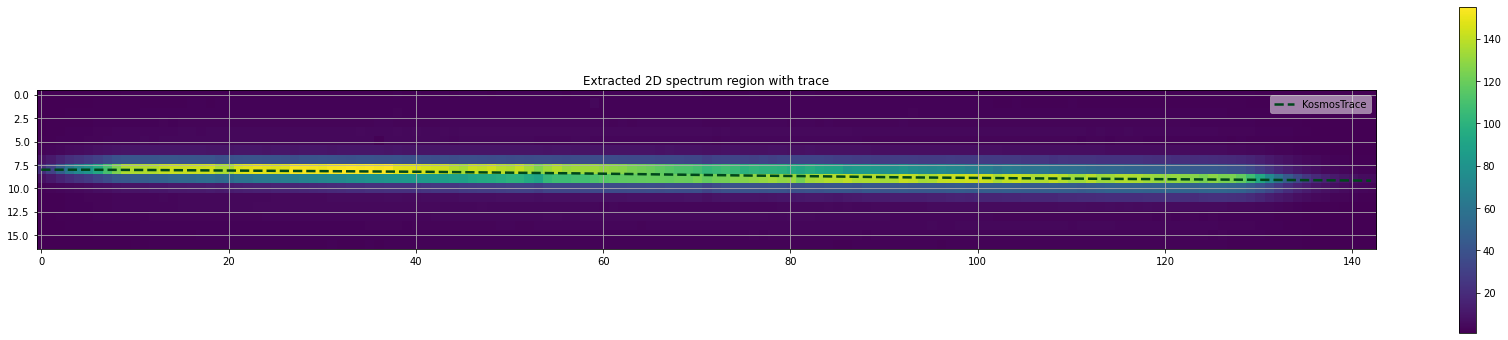

In [51]:
# Plot trace
aspect_ratio2 = sliced_data.shape[1] / (1 * sliced_data.shape[0])
fig3, ax3 = plt.subplots(figsize=(30,6))

'''
plot3 = ax3.imshow(sliced_data, aspect=aspect_ratio2,
                   vmin=0, vmax=sliced_data.max(),
                   cmap=mpl.cm.magma, origin='lower',
                   extent=(0, sliced_data.shape[-1],
                           0, sliced_data.shape[0]))
'''
# I didn't like the plotting above that much, doing this to be consistent with earlier plots.
plot3 = ax3.imshow(sliced_data)
fig3.colorbar(plot3)
ax3.set_title('Extracted 2D spectrum region with trace')
ax3.grid()

# add the traces
ax3.plot(trace.trace, '--', color='#00471b',
         lw=2.5, label='KosmosTrace')
ax3.legend(framealpha=.5)
plt.show()

In [53]:
sliced_data.shape

(17, 143)

In [56]:
ext = OptimalExtract()
result1d = ext(sliced_data, trace, variance=error_array)

In [58]:
result1d

<Spectrum1D(flux=<Quantity [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]>, spectral_axis=<SpectralAxis [  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
    12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
    24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
    36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  4

In [52]:
ext?